In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

# Create 30 employee IDs
employee_ids = [f"EMP_{i:03d}" for i in range(1, 31)]
dates = pd.date_range("2025-07-01", periods=30, freq="D")

In [3]:
# Simulate working hours (between 4 and 10 hours/day)

data = {
    "Date": np.tile(dates, len(employee_ids)),
    "Employee_ID": np.repeat(employee_ids, len(dates)),
    "Working_Hours": np.random.uniform(4, 10, size=len(dates) * len(employee_ids)).round(2)
}

In [4]:
# Create DataFrame
df = pd.DataFrame(data)

In [5]:
# Save to CSV
df.to_csv("employee_working_hours.csv", index=False)

In [6]:
# Read from CSV
df_csv = pd.read_csv("employee_working_hours.csv")

In [7]:
print(df_csv.head())
print(df_csv.describe())
print("Unique Employees:", df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
Unique Employees: 30


In [8]:
# Total hours per employee
total_hours = df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [9]:
# Average daily hours per employee
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [10]:
print("Top 5 Employees by Total Hours:\n", total_hours.head())

Top 5 Employees by Total Hours:
 Employee_ID
EMP_009    228.84
EMP_018    226.10
EMP_017    225.95
EMP_014    224.92
EMP_027    220.85
Name: Working_Hours, dtype: float64


In [11]:
print("Average Daily Hoursper Employee:\n", avg_daily.head())

Average Daily Hoursper Employee:
 Employee_ID
EMP_001    6.632000
EMP_002    6.979000
EMP_003    6.893000
EMP_004    6.948667
EMP_005    6.735667
Name: Working_Hours, dtype: float64


In [12]:
# Thresholds
threshold_low = 5
threshold_high = 9

# Flag low and high working hours
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hour_Flag"] = df_csv["Working_Hours"] > threshold_high

#view flagged rows
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


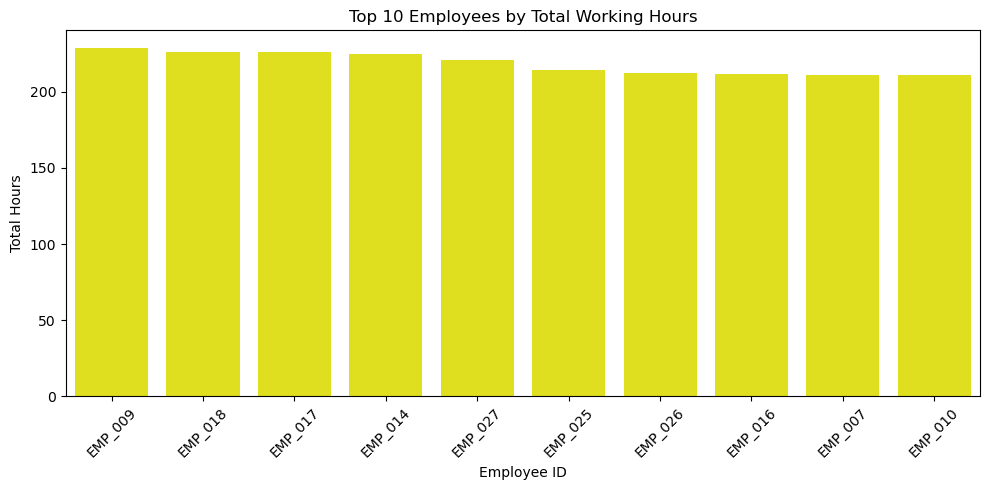

In [13]:
# Bar chart of top 10 employees with highest total hours

top10 = total_hours.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10.index, y=top10.values, color="yellow")
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Total Hours")
plt.xlabel("Employee ID")
plt.tight_layout()
plt.show()

In [14]:
row = df.iloc[52]
row

Date             2025-07-23 00:00:00
Employee_ID                  EMP_002
Working_Hours                   9.64
Name: 52, dtype: object

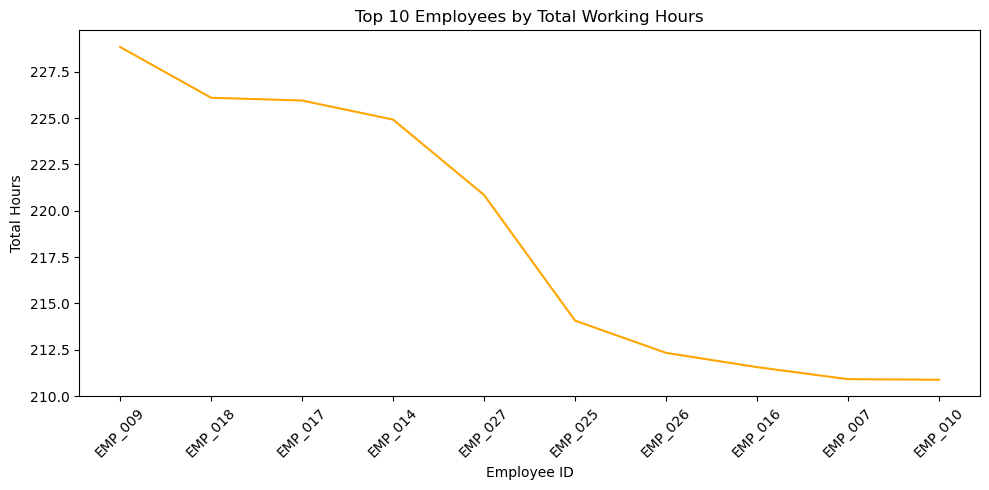

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=top10.index, y=top10.values,color="orange")
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Total Hours")
plt.xlabel("Employee ID")
plt.tight_layout()
plt.show()

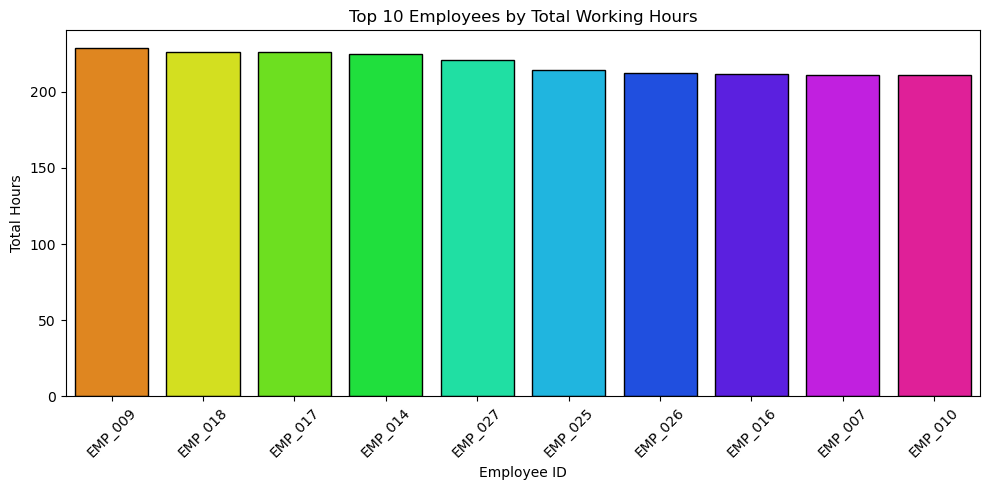

In [16]:
top10_df = top10.reset_index()
top10_df.columns = ["Employee_ID", "Total_Hours"]

# Generate colors
colors = sns.color_palette("hsv", len(top10_df))

# Plot with hue and legend disabled
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10_df,
    x="Employee_ID",
    y="Total_Hours",
    hue="Employee_ID",  # needed for correct palette mapping
    palette=colors,
    dodge=False,
    legend=False        # hides redundant color legend
    ,edgecolor="black")
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Total Hours")
plt.xlabel("Employee ID")
plt.tight_layout()
plt.show()
